In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch


torch.manual_seed(13)

# Logistic Regression

$\newcommand{\vecx}{{\bf x}}$
$\newcommand{\vecw}{{\bf w}}$

## Problem Formulation
We have supervised classification problem. Given training dataset $X^l = \{ (\vecx_1,y_1)\ldots, (\vecx_l, y_l) \}$, where $\bf{x}_i \in \mathbb{R}^n$ and $y\in \{0,1\}$.

## Model
We will find solution in a following form: $\vecx \cdot \vecw^T$ which is hyperplane in $n$-dimensional space.

To make prediction: $\hat{y} = \sigma (\vecx \cdot \vecw^T)$.

## Loss Function
General Loss function can be defined in the following form:

$$ \mathcal{L}(X^l \mid \vecw) = \sum\limits_{i=1}^{l} \mathcal{I}\{ (y_i - 0.5) (\vecx \cdot \vecw^T) < 0 \} . $$

Our goal is $\mathcal{L}(X^l \mid \vecw) \to \min $ - reduce total number of misclassifications.

## Optimization
In this form $\mathcal{L}$ is not differentiable, so we will use $\mathcal{L} \leq L$ which is defferentiable, so we can find its minimum wrt $\vecw$ using Gradient Descent.

In case of logistic regression $L = -\sum y_i \log \sigma(\vecx_i \vecw^T) + (1-y_i) \log(1 -\sigma(\vecx_i \vecw^T) ) $ - logistic loss.

### Likelihood

Likelihood of data given parameters:

$$\mathcal{L}(X^l \mid \vecw) = \prod\limits_{i=1}^{l} P \{ y=y_i \mid \vecx_i, \vecw \}, $$
where $P \{ y=y_i \mid \vecx_i, \vecw \} = \sigma(\vecx_i \vecw^T)^{y_i} (1-\sigma(\vecx_i \vecw^T))^{1-y_i}$.

We can find $\vecw$ such that $P\{ \vecw | X^l \} = \frac{P(\vecw) P(X^l \mid \vecw)}{P(X^l)} \to \max$.

If we ignore $P(\vecw)$ then $$\begin{align} \vecw &= \arg\max \log \mathcal{L}(X^l \mid \vecw) \\ &= \arg\max  \sum\limits_{i=1}^{l} \left( y_i \log \sigma(\vecx_i \vecw^T) + (1-y_i) \log(1 -\sigma(\vecx_i \vecw^T)  \right)  \\ &= \arg\max - \sum\limits_{i=1}^{l} \left( y_i \log (1 + e^{-\vecx_i \vecw^T}) + (1-y_i) \log(1 + e^{\vecx_i \vecw^T})  \right) \end{align}  $$

Therefore, maximazing log-likelihood is the same as minimazing logistic-loss.

In [2]:
import torch.nn as nn


class LogReg(nn.Module):
    def __init__(self, in_size):
        super(LogReg, self).__init__()
        self.model = nn.Sequential(nn.Linear(in_size, 1), nn.Sigmoid())
        
    def forward(self, x):
        out = self.model(x)
        return out

In [5]:
lr = LogReg(1)
lr(torch.tensor([1.]))

tensor([0.3182], grad_fn=<SigmoidBackward>)

In [8]:
print(list(lr.parameters()))

[Parameter containing:
tensor([[-0.9694]], requires_grad=True), Parameter containing:
tensor([0.2071], requires_grad=True)]


## Dataset

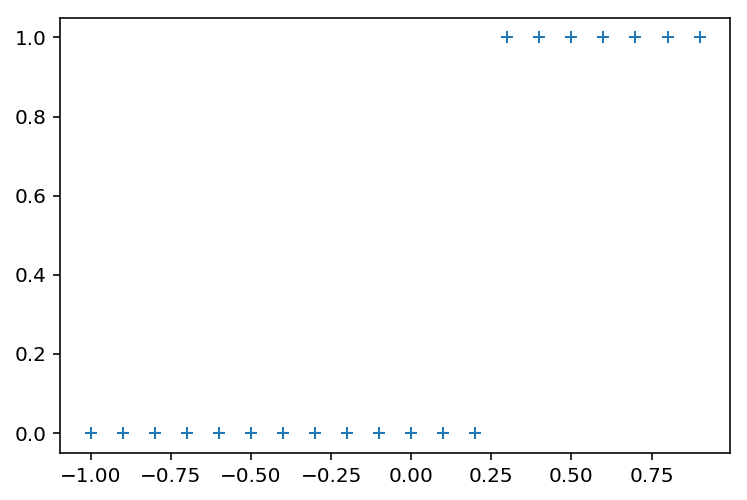

In [10]:
from torch.utils.data import Dataset, DataLoader


class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
    
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len


x, y = zip(*[(x, y) for x, y in Data()])
plt.plot(x, y, '+')
plt.show()

## Training

In [15]:
# Binary Cross Entropy Loss
loss_f = nn.BCELoss()

optimizer = torch.optim.SGD(lr.parameters(), lr=0.1)

dataset = Data()
dataloader = DataLoader(dataset=dataset, batch_size=5)

for epoch in range(100):
    for x, y in dataloader:
        loss = loss_f(lr(x), y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [16]:
print(list(lr.parameters()))

[Parameter containing:
tensor([[3.6738]], requires_grad=True), Parameter containing:
tensor([-0.8978], requires_grad=True)]


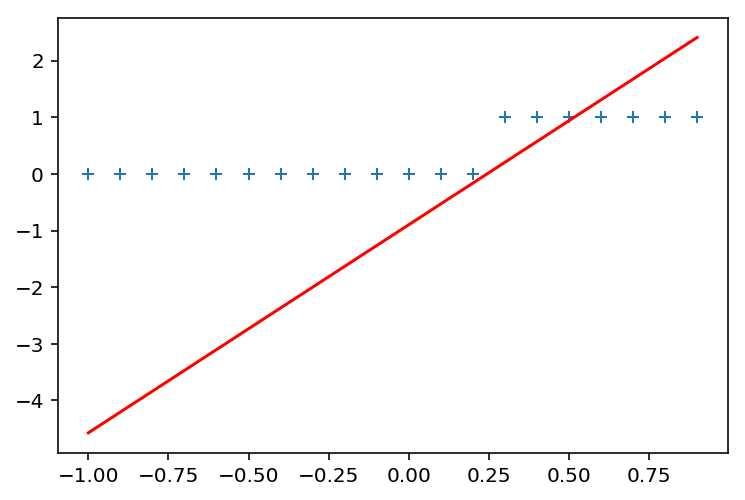

In [19]:
x, y = zip(*[(x, y) for x, y in Data()])
plt.plot(x, y, '+')
x = np.array(x)
plt.plot(x, x * (3.6738) + (-0.8978), 'r')
plt.show()